In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


# **Loading The Data**

In [ ]:
df = pd.read_csv('../insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Number of rows and columns in the dataset
print("The number of rows in the dataset are: ", df.shape[0])
print("The number of columns which can be used to predict the charges: ", df.shape[1] - 1)

The number of rows in the dataset are:  1338
The number of columns which can be used to predict the charges:  6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Checking for null values which might hamper with the model
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


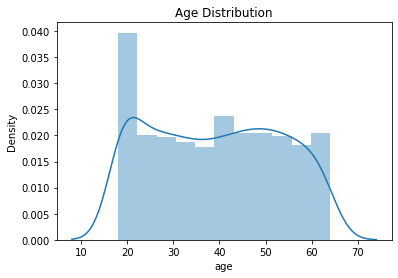

In [ ]:
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

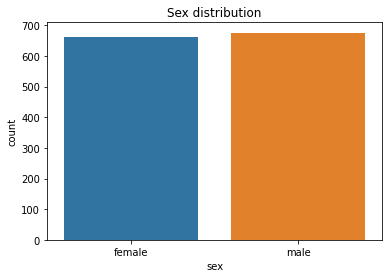

In [ ]:
sns.countplot(x=df['sex'], data=df)
plt.title("Sex distribution")
plt.show()

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


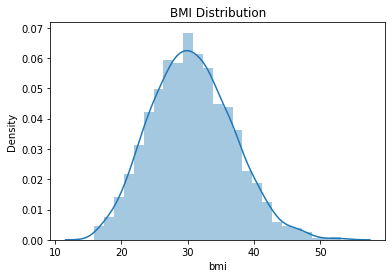

In [ ]:
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

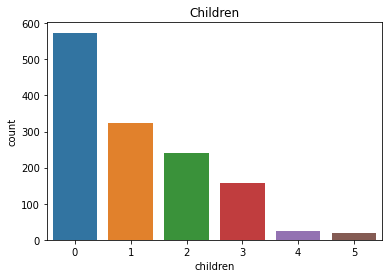

In [ ]:
sns.countplot(x=df['children'], data=df)
plt.title("Children")
plt.show()

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

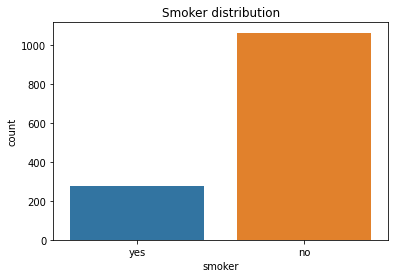

In [ ]:
sns.countplot(x=df['smoker'], data=df)
plt.title("Smoker distribution")
plt.show()

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

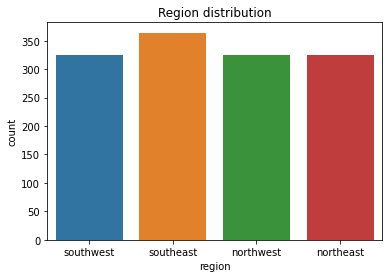

In [ ]:
data = df
sns.countplot(x=df['region'], data=df)
plt.title("Region distribution")
plt.show()

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


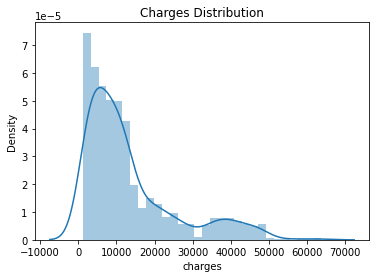

In [ ]:
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [ ]:
#Replace male=0 and female=1
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

#If smoker yes, then 1 else 0
df.replace({'smoker':{'no':0,'yes':1}}, inplace=True)

#encoding regions
df.replace({'region':{'northeast':0,'northwest':1,'southeast':2,'southwest':3}}, inplace=True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [ ]:
X = df.drop(columns='charges')
Y = df['charges']

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1


In [ ]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#creating vectors
x = X.to_numpy()
y = Y.to_numpy()

# Seperating the test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

# Predicting the test Set

In [ ]:
Y_pred = regr.predict(X_test)
np.set_printoptions(precision = 2)

#concatenating the two vectors for side by side comparision of predicted and expected values
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_pred), 1)),1))

[[ 8924.41  9095.07]
 [ 7116.3   5272.18]
 [36909.01 29330.98]
 [ 9507.87  9301.89]
 [27013.35 33750.29]
 [10790.78  4536.26]
 [  226.3   2117.34]
 [16942.72 14210.54]
 [ 1056.63  3732.63]
 [11267.92 10264.44]
 [28048.6  18259.22]
 [ 9424.36  7256.72]
 [ 5326.32  3947.41]
 [38460.06 46151.12]
 [40303.41 48673.56]
 [37147.01 44202.65]
 [15287.92  9800.89]
 [35965.05 42969.85]
 [ 9179.18  8233.1 ]
 [31510.83 21774.32]
 [ 3797.79  5080.1 ]
 [10070.83  7441.5 ]
 [ 2312.58  1256.3 ]
 [ 7074.41  2755.02]
 [11352.37 11085.59]
 [12907.77 10923.93]
 [14448.85 12644.59]
 [ 6205.66 18804.75]
 [ 9917.01  9715.84]
 [ 2239.5   1131.51]
 [ 9060.55 15828.82]
 [13120.56 11842.62]
 [ 4617.71  2020.55]
 [ 3467.91  5693.43]
 [ 4402.75  2904.09]
 [12967.92  7448.4 ]
 [ 1927.44  2597.78]
 [ 8757.92  7337.75]
 [33324.35 23887.66]
 [32638.48 38709.18]
 [ 3852.42  4687.8 ]
 [ 4370.4   2643.27]
 [14080.76 11674.13]
 [11478.63 12124.99]
 [ 8829.26  4890.  ]
 [12046.15 12333.83]
 [ 5322.81  3579.83]
 [ 3100.71  4

In [ ]:
r2_test = metrics.r2_score(Y_test, Y_pred)
print('R squared value : ', r2_test)

R squared value :  0.7833463107364538


**Prediction System**

In [ ]:
user_data = (22,0,24.96,0,0,0)

# change data to np array
user_data_array = (np.asarray(user_data)).reshape(1,-1)
prediction = regr.predict(user_data_array)
print(prediction)

print('Insurace Cost is %.2f' % prediction[0], 'USD')

[2070.95]
Insurace Cost is 2070.95 USD


In [ ]:
print(regr.coef_)
print(f"{regr.intercept_:.2f}")

[ 2.57e+02  1.88e+01  3.36e+02  4.25e+02  2.36e+04 -2.71e+02]
-11965.40


# Support Vector Regression



In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
sc_ytrain = StandardScaler()
sc_xtrain = StandardScaler()
sc_ytest = StandardScaler()
sc_xtest = StandardScaler()

In [ ]:
x_trans = sc_x.fit_transform(x)
y.resize((len(y)), 1)
y_trans = sc_y.fit_transform(y)

y_transTrain = Y_train
y_transTrain.resize((len(Y_train)), 1)
y_transTrain = sc_ytrain.fit_transform(Y_train)

x_transTrain = X_train
x_transTrain = sc_xtrain.fit_transform(X_train)

y_transTest = Y_test
y_transTest.resize((len(Y_test)), 1)
y_transTest = sc_ytest.fit_transform(Y_test)

x_transTest = X_test
x_transTest = sc_xtest.fit_transform(X_test)

Applying fit transform to perform scaling using mean and std dev calculated

In [ ]:
print(x_transTrain.shape)
print(y_transTrain.shape)
print(x_transTest.shape)
print(y_transTest.shape)

(1070, 6)
(1070, 1)
(268, 6)
(268, 1)


In [ ]:
from sklearn.svm import SVR
regrs = SVR(kernel = 'rbf')
regrs.fit(x_transTrain, y_transTrain.ravel())

SVR()

In [ ]:
y_pred_svr = regrs.predict(x_transTest)
np.set_printoptions(precision = 2)

#inverse_transform is used to convert the scaled data back to its original values
print(np.concatenate((sc_ytest.inverse_transform(y_pred_svr.reshape(len(y_pred_svr),1)), sc_ytest.inverse_transform(y_transTest.reshape(len(y_pred_svr), 1))),1))

[[ 9720.09  9095.07]
 [ 5809.81  5272.18]
 [30396.82 29330.98]
 [10022.25  9301.89]
 [27523.37 33750.29]
 [ 5191.3   4536.26]
 [ 2160.7   2117.34]
 [15274.67 14210.54]
 [ 4754.97  3732.63]
 [11210.31 10264.44]
 [17633.44 18259.22]
 [ 8336.67  7256.72]
 [ 4283.89  3947.41]
 [44705.66 46151.12]
 [48020.91 48673.56]
 [47323.   44202.65]
 [10462.37  9800.89]
 [48353.58 42969.85]
 [ 9033.33  8233.1 ]
 [23191.98 21774.32]
 [ 6814.41  5080.1 ]
 [ 8553.15  7441.5 ]
 [ 1859.27  1256.3 ]
 [ 3155.88  2755.02]
 [11978.02 11085.59]
 [12103.26 10923.93]
 [13860.3  12644.59]
 [ 5527.67 18804.75]
 [10401.36  9715.84]
 [ 1798.98  1131.51]
 [ 8464.48 15828.82]
 [12973.24 11842.62]
 [ 2311.38  2020.55]
 [ 6125.47  5693.43]
 [ 3632.98  2904.09]
 [ 8750.14  7448.4 ]
 [ 2375.47  2597.78]
 [ 8037.19  7337.75]
 [23728.05 23887.66]
 [38601.13 38709.18]
 [ 6055.54  4687.8 ]
 [ 3412.63  2643.27]
 [12877.34 11674.13]
 [13384.98 12124.99]
 [ 5885.03  4890.  ]
 [13316.25 12333.83]
 [ 4219.65  3579.83]
 [ 4954.34  4

Values predicted by the SVR model vs values expected

In [ ]:
sc_y.inverse_transform(regrs.predict(sc_x.transform([[22, 0, 24.96, 0, 0, 0]])).reshape(-1,1))

array([[2979.69]])

Predicting the cost by values inserted by the user

In [ ]:
r2_test = metrics.r2_score(y_transTest, y_pred_svr)
print('R squared value : ', r2_test)

R squared value :  0.8674243092938172


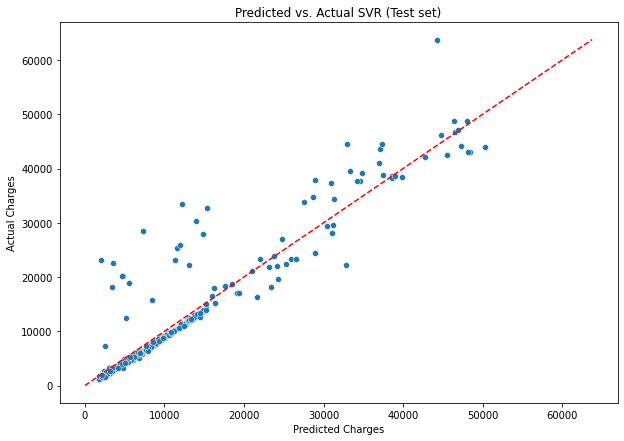

In [ ]:
x_plot = sc_ytest.inverse_transform(y_pred_svr.reshape(len(y_pred_svr),1))
x_plot = x_plot.reshape(-1)
y_plot = sc_ytest.inverse_transform(y_transTest)
y_plot = y_plot.reshape(-1)
plt.figure(figsize=(10,7))
sns.scatterplot(x = x_plot,y = y_plot);
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.title('Predicted vs. Actual SVR (Test set)')
l = np.linspace(0,y_plot.max(),500);
plt.plot(l,l,ls='--',color='red');